<a href="https://colab.research.google.com/github/Kiyk0/Diabetes-Health-Indicators/blob/main/Diabetes_Health_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Health Indicators

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import kagglehub
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)
df = pd.read_csv(path + "/diabetes_binary_health_indicators_BRFSS2015.csv")

Path to dataset files: /kaggle/input/diabetes-health-indicators-dataset


0 → Person does not have diabetes.

1 → Person has diabetes (confirmed).

In [3]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Data Pre-processing
1- Handling Null Values

2- Dropping Features which have more than 80% of values with the same value

3- removing highly correlated features to avoid multi-collinearity as much as we can

4- removing/clamping outliers

5- transforming highly skewed data to reduce their skewness

6- checking for each features whether it follows a normal distribution or not to decide whether to standardize or min-max scale)

### Handling Null Values

In [7]:
print(df.isnull().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


### Dropping Features which have more than 80% of values with the same value

Little to no predictive power: If a feature has nearly the same value for most records, it doesn't help the model distinguish between classes.

Adds noise: It can actually hurt performance or slow down training.

Reduces dimensionality: Fewer features = simpler, more efficient model.



In [8]:
df = df.reset_index()

In [9]:
crucial_features = [
    'GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age',
    'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'PhysActivity',
    'Education', 'Income', 'Diabetes_binary'
]

In [10]:
def dropping_val_with_same_value_80_per(count_df, df):
    highest_freq = (count_df["count"] / df.shape[0]).reset_index().sort_values(by=["count"], ascending=False).iloc[0, 1]
    if highest_freq > 0.8:
        print('we will drop the column: ', count_df.columns[0])
        df = df.drop(columns=[count_df.columns[0]], axis=1)
    return df


df_list = []
clos = list(set(df.columns) - set(["index"]) - set(crucial_features))
for col in clos:
    df_list.append(df.groupby([col])["index"].count().reset_index().rename(columns={"index": "count"}))

In [11]:
for idx in range(len(df_list)):
    df = dropping_val_with_same_value_80_per(df_list[idx], df)

we will drop the column:  Veggies
we will drop the column:  AnyHealthcare
we will drop the column:  NoDocbcCost
we will drop the column:  HvyAlcoholConsump
we will drop the column:  CholCheck


In [12]:
df

,index,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,253677,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


### removing highly correlated features to avoid multi-collinearity as much as we can

If we have 2 highly correlated features (corr > 0.7), we drop one of them (the variable which is less correlated to the response variable)

In [13]:
corr_matrix = df.corr()

In [14]:
corr_matrix['Diabetes_binary'].sort_values(ascending=False)

,Diabetes_binary
Diabetes_binary,1.000000
GenHlth,0.293569
HighBP,0.263129
DiffWalk,0.218344
BMI,0.216843
HighChol,0.200276
Age,0.177442
HeartDiseaseorAttack,0.177282
PhysHlth,0.171337
Stroke,0.105816


<Axes: >

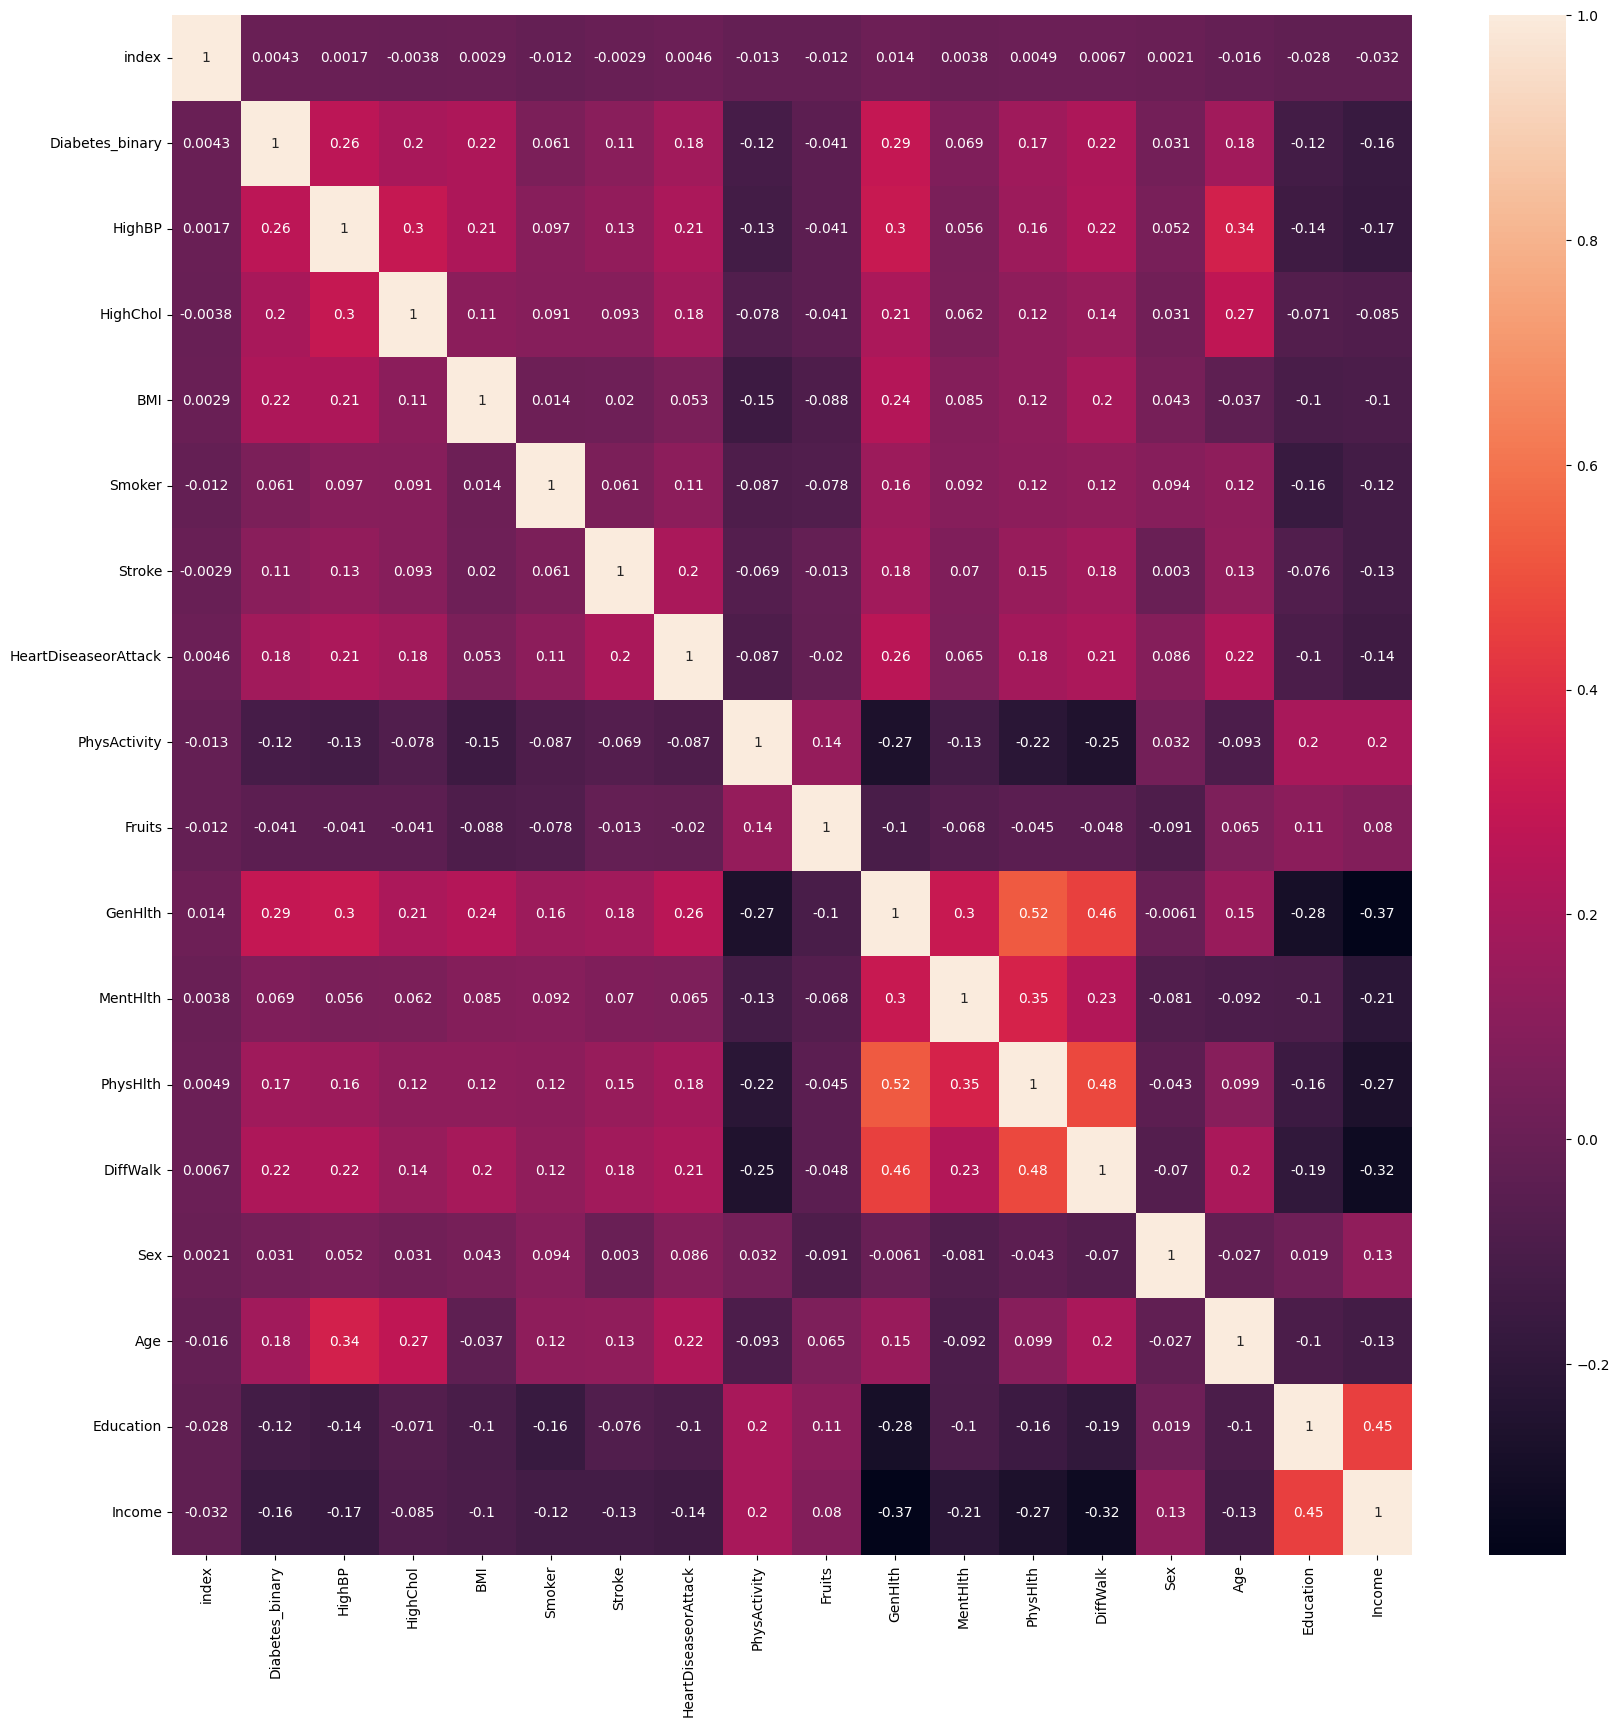

In [15]:
plt.figure(figsize=(20, 20))

sns.heatmap(corr_matrix, annot=True)

In [16]:
df.columns

Index(['index', 'Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [17]:
df_without_response = list(set(df) - set(["Diabetes_binary"]))
corr_matrix = df[df_without_response]

In [18]:
df.shape

(253680, 18)

In [19]:
corr_matrix = corr_matrix.corr()
corr_matrix

,BMI,Smoker,PhysActivity,PhysHlth,MentHlth,HeartDiseaseorAttack,index,HighBP,Education,HighChol,GenHlth,Age,Stroke,Income,Fruits,Sex,DiffWalk
BMI,1.000000,0.013804,-0.147294,0.121141,0.085310,0.052904,0.002872,0.213748,-0.103932,0.106722,0.239185,-0.036618,0.020153,-0.100069,-0.087518,0.042950,0.197078
Smoker,0.013804,1.000000,-0.087401,0.116460,0.092196,0.114441,-0.011611,0.096991,-0.161955,0.091299,0.163143,0.120641,0.061173,-0.123937,-0.077666,0.093662,0.122463
PhysActivity,-0.147294,-0.087401,1.000000,-0.219230,-0.125587,-0.087299,-0.013229,-0.125267,0.199658,-0.078046,-0.266186,-0.092511,-0.069151,0.198539,0.142756,0.032482,-0.253174
PhysHlth,0.121141,0.116460,-0.219230,1.000000,0.353619,0.181698,0.004902,0.161212,-0.155093,0.121751,0.524364,0.099130,0.148944,-0.266799,-0.044633,-0.043137,0.478417
MentHlth,0.085310,0.092196,-0.125587,0.353619,1.000000,0.064621,0.003844,0.056456,-0.101830,0.062069,0.301674,-0.092068,0.070172,-0.209806,-0.068217,-0.080705,0.233688
HeartDiseaseorAttack,0.052904,0.114441,-0.087299,0.181698,0.064621,1.000000,0.004620,0.209361,-0.099600,0.180765,0.258383,0.221618,0.203002,-0.141011,-0.019790,0.086096,0.212709
index,0.002872,-0.011611,-0.013229,0.004902,0.003844,0.004620,1.000000,0.001661,-0.027565,-0.003842,0.014311,-0.015554,-0.002932,-0.031548,-0.011698,0.002087,0.006745
HighBP,0.213748,0.096991,-0.125267,0.161212,0.056456,0.209361,0.001661,1.000000,-0.141358,0.298199,0.300530,0.344452,0.129575,-0.171235,-0.040555,0.052207,0.223618
Education,-0.103932,-0.161955,0.199658,-0.155093,-0.101830,-0.099600,-0.027565,-0.141358,1.000000,-0.070802,-0.284912,-0.101901,-0.076009,0.449106,0.110187,0.019480,-0.192642
HighChol,0.106722,0.091299,-0.078046,0.121751,0.062069,0.180765,-0.003842,0.298199,-0.070802,1.000000,0.208426,0.272318,0.092620,-0.085459,-0.040859,0.031205,0.144672


In [20]:
set_high = set()

In [21]:
for row_idx in range(0, corr_matrix.shape[0]):
    for col_idx in range(row_idx + 1, corr_matrix.shape[0]):
        if (np.abs(corr_matrix.values[row_idx, col_idx]) > 0.7):
            var_row_corr_with_response = np.abs(np.corrcoef(df["Diabetes_binary"], df[df_without_response[row_idx]]))[0, 1]
            var_col_corr_with_response = np.abs(np.corrcoef(df["Diabetes_binary"], df[df_without_response[col_idx]]))[0, 1]

            if var_row_corr_with_response > var_col_corr_with_response:
                set_high.add(df_without_target[col_idx])
            else:
                set_high.add(df_without_target[row_idx])

In [22]:
hight_corr = list(set_high)
hight_corr

[]

### Clamp outlires and log-transform any highly skewed variable

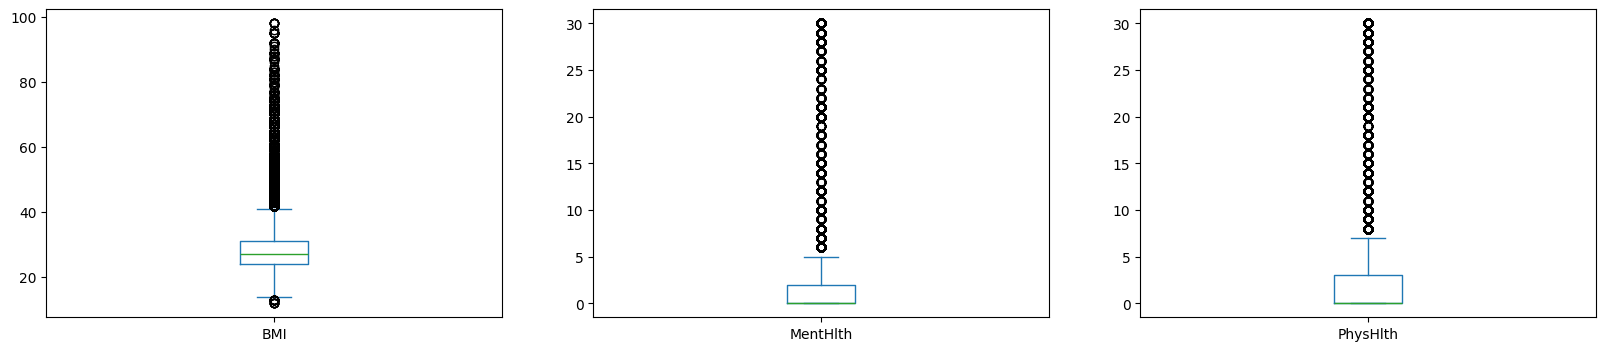

In [23]:
df[["BMI", "MentHlth", "PhysHlth"]].plot(kind='box',subplots=True,figsize=(20,4),sharex=False);

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>]], dtype=object)

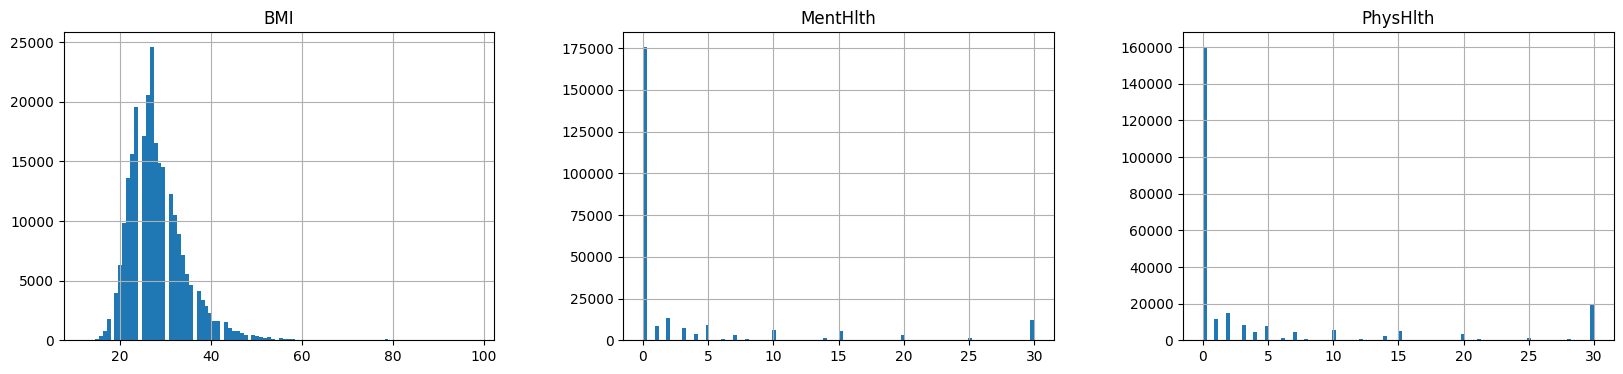

In [24]:
df[["BMI", "MentHlth", "PhysHlth"]].hist(bins=100, figsize=(20, 4), layout=(1, 3))

In [25]:
print(df["BMI"].skew())
print(df["MentHlth"].skew())
print(df["PhysHlth"].skew())

# Z-score is NOT recommended — it assumes normal distribution.
# IQR is the safer and more robust choice for detecting and handling outliers.

2.122003758291108
2.721148365662696
2.2073949151986723


In [26]:
def clamp_outliers_vectorized(df, col):
    Q1 = np.percentile(df[col], 25, method='midpoint')
    Q3 = np.percentile(df[col], 75, method='midpoint')
    IQR = Q3 - Q1
    Lower_Bound = Q1 - 1.5 * IQR
    Upper_Bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] > Upper_Bound, Upper_Bound,
                       np.where(df[col] < Lower_Bound, Lower_Bound, df[col]))

In [27]:
def transform_skewed_vectorized(df, col):
    skewness = skew(df[col])
    if (skewness >= 1 or skewness <= -1):
        df[col] = np.log1p(df[col])  # log(1+x)

In [28]:
from scipy.stats import skew

columns_to_process = ["BMI", "MentHlth", "PhysHlth"]

for col in columns_to_process:
    clamp_outliers_vectorized(df, col)

for col in columns_to_process:
    transform_skewed_vectorized(df, col)

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>]], dtype=object)

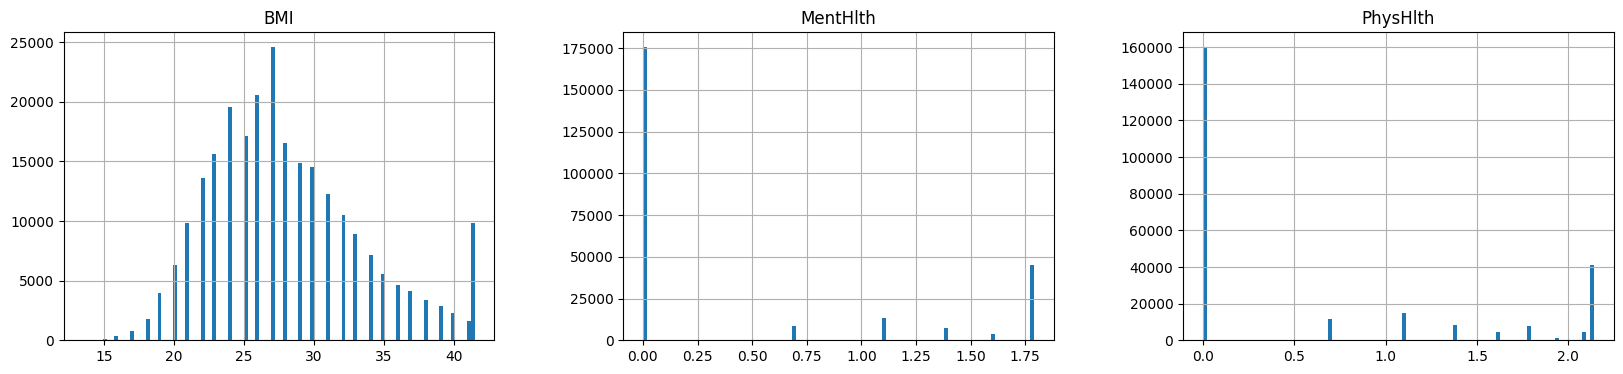

In [29]:
df[["BMI", "MentHlth", "PhysHlth"]].hist(bins=100, figsize=(20, 4), layout=(1, 3))

In [30]:
print(df["BMI"].skew())
print(df["MentHlth"].skew())
print(df["PhysHlth"].skew())

0.6260386302118345
1.0550792686605421
0.8819822225066679


### Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler

if 'index' in df.columns:
    df = df.drop(columns=['index'])

X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

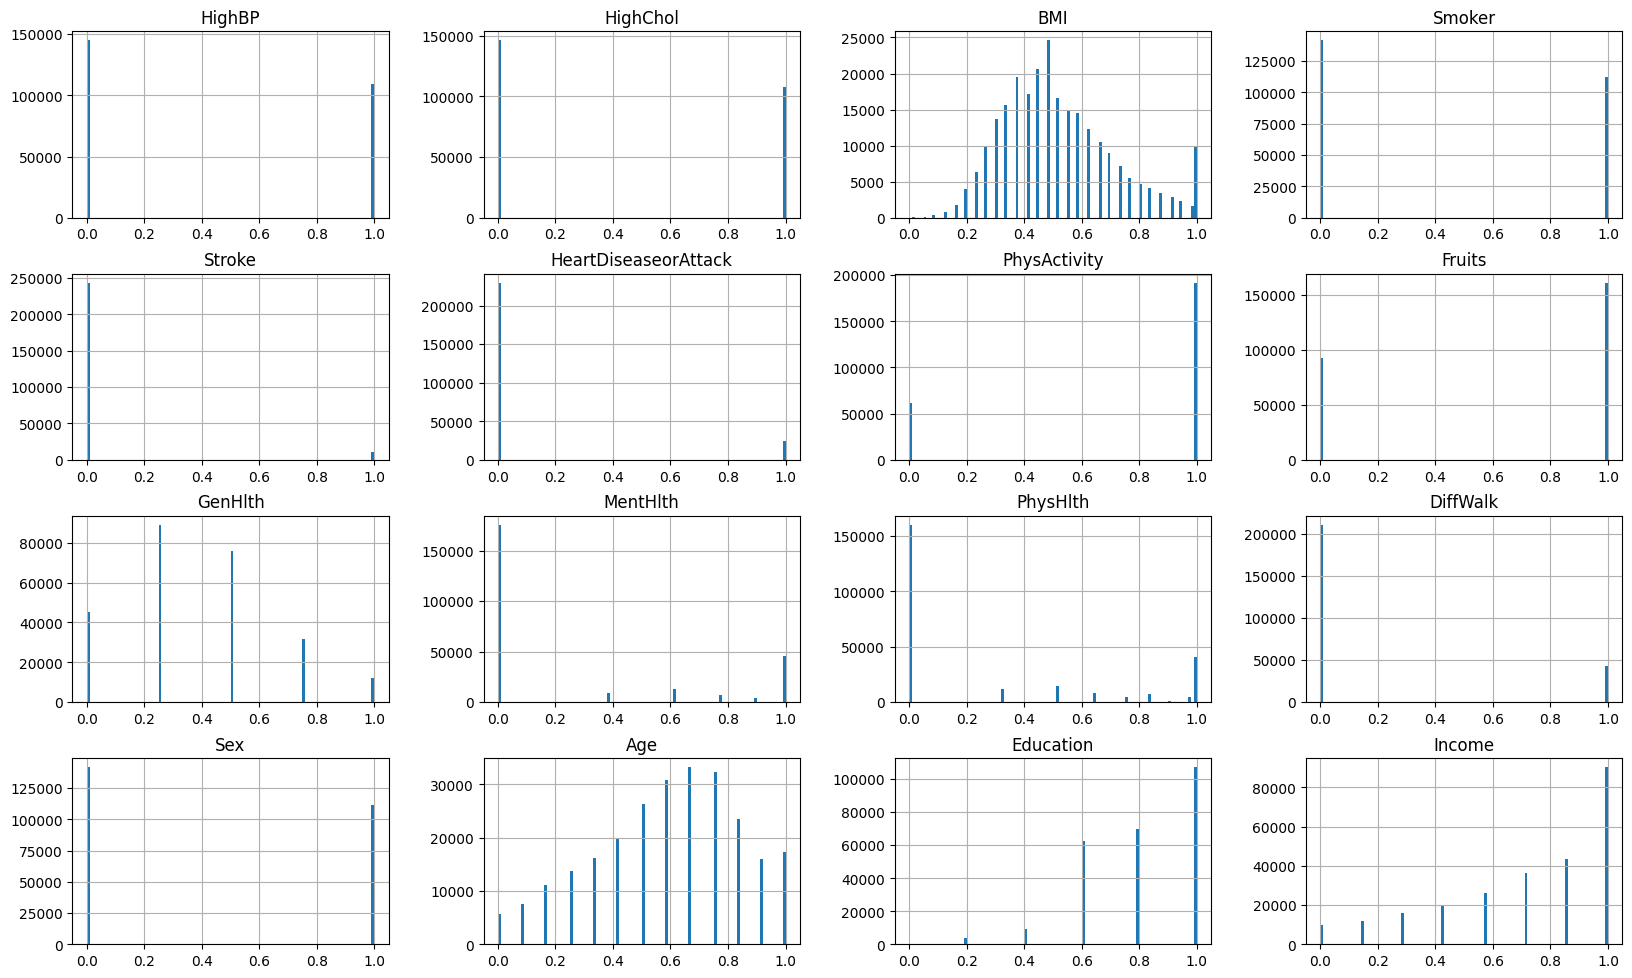

In [32]:
X_scaled.hist(bins=100, figsize=(20, 15), layout=(5, 4))

In [33]:
df['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,218334
1.0,35346


In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
print(len(df))
print(len(x_train))
print(len(x_test))

253680
202944
50736


## Model Evalutation
Metric	Meaning
- Accuracy	Overall how many correct predictions.
- Precision	How many predicted positives are actually positive.
- Sensitivity (Recall)	How many actual positives are detected.
- Specificity	How many actual negatives are detected.
- F1-Score	Harmonic mean of Precision and Recall.
- Hamming Loss	Fraction of wrong labels (smaller is better).

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss

def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    ham_loss = hamming_loss(y_true, y_pred)

    # Confusion matrix to calculate Specificity
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0][0]
    fp = cm[0][1]
    specificity = tn / (tn + fp)

    return {
        'Accuracy': acc,
        'Precision': prec,
        'Sensitivity (Recall)': rec,
        'Specificity': specificity,
        'F1-Score': f1,
        'Hamming Loss': ham_loss
    }

## Models

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=10)
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(random_state=10)

In [42]:
# Predictions
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

print("Random Forest Training Results:")
metrics_train_rf = evaluate_model(y_train, y_train_pred_rf)
print(metrics_train_rf)

print("\nRandom Forest Testing Results:")
metrics_test_rf = evaluate_model(y_test, y_test_pred_rf)
print(metrics_test_rf)

Random Forest Training Results:
{'Accuracy': 0.9915543204036582, 'Precision': 0.9915476322297272, 'Sensitivity (Recall)': 0.947617199901231, 'Specificity': np.float64(0.9986883931384061), 'F1-Score': 0.969084809350312, 'Hamming Loss': 0.008445679596341849}

Random Forest Testing Results:
{'Accuracy': 0.856334752444024, 'Precision': 0.4496551724137931, 'Sensitivity (Recall)': 0.18636558525082178, 'Specificity': np.float64(0.9635108255790027), 'F1-Score': 0.2635141962210771, 'Hamming Loss': 0.14366524755597604}


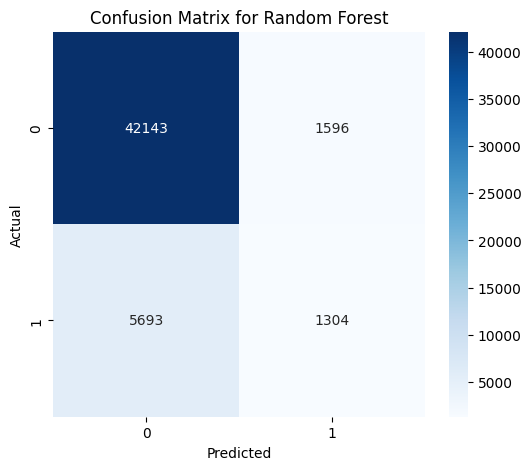

In [43]:
cm1 = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

<ipython-input-44-f9dc19188fd1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(10), palette='Blues')


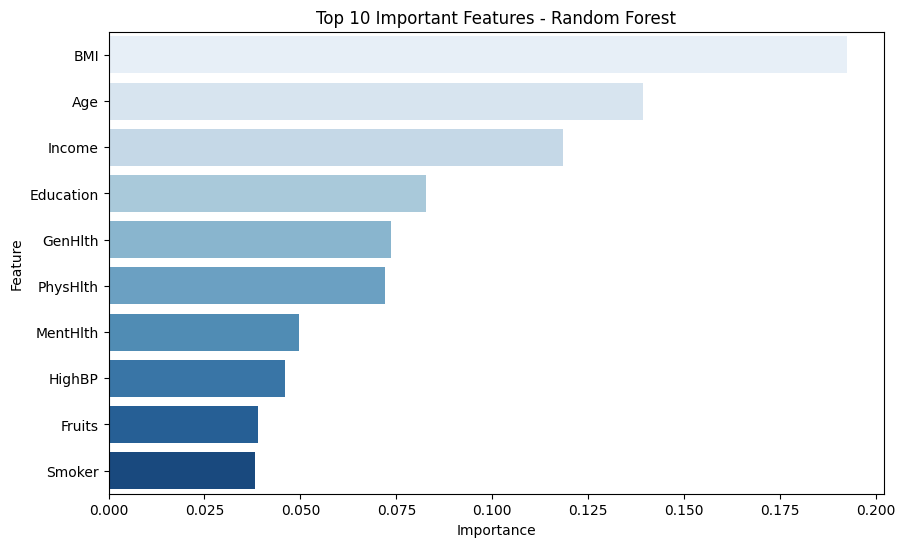

In [44]:
importances = rf.feature_importances_
features = x_train.columns

# Create a DataFrame
rf_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort by importance
rf_importance_df = rf_importance_df.sort_values('Importance', ascending=False)

# Plot top features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(10), palette='Blues')
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(x_train, y_train.values.ravel())

DecisionTreeClassifier(random_state=10)

In [46]:
y_train_pred_dt = dt_model.predict(x_train)
y_test_pred_dt = dt_model.predict(x_test)

print("Decision Tree Training Results:")
metrics_train_dt = evaluate_model(y_train, y_train_pred_dt)
print(metrics_train_dt)

print("\nDecision Tree Testing Results:")
metrics_test_dt = evaluate_model(y_test, y_test_pred_dt)
print(metrics_test_dt)

Decision Tree Training Results:
{'Accuracy': 0.9916183774834437, 'Precision': 0.9982424650362726, 'Sensitivity (Recall)': 0.9416557903277012, 'Specificity': np.float64(0.9997308055786248), 'F1-Score': 0.9691238133270407, 'Hamming Loss': 0.00838162251655629}

Decision Tree Testing Results:
{'Accuracy': 0.8003390097760958, 'Precision': 0.2953090291388998, 'Sensitivity (Recall)': 0.32299556952979847, 'Specificity': np.float64(0.8767004275360663), 'F1-Score': 0.30853242320819113, 'Hamming Loss': 0.19966099022390413}


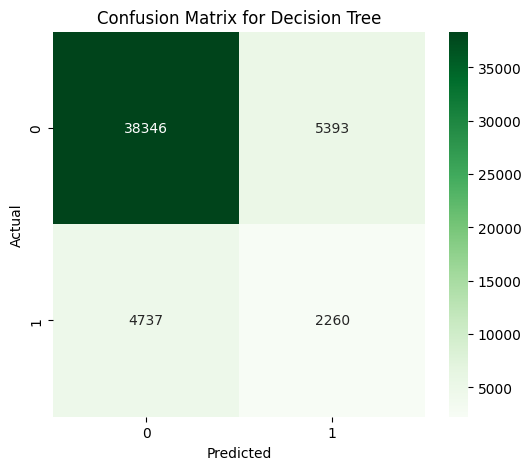

In [47]:
cm2 = confusion_matrix(y_test, y_test_pred_dt)

plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

<ipython-input-48-b3b427c2d2a0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=dt_importance_df.head(10), palette='Greens')


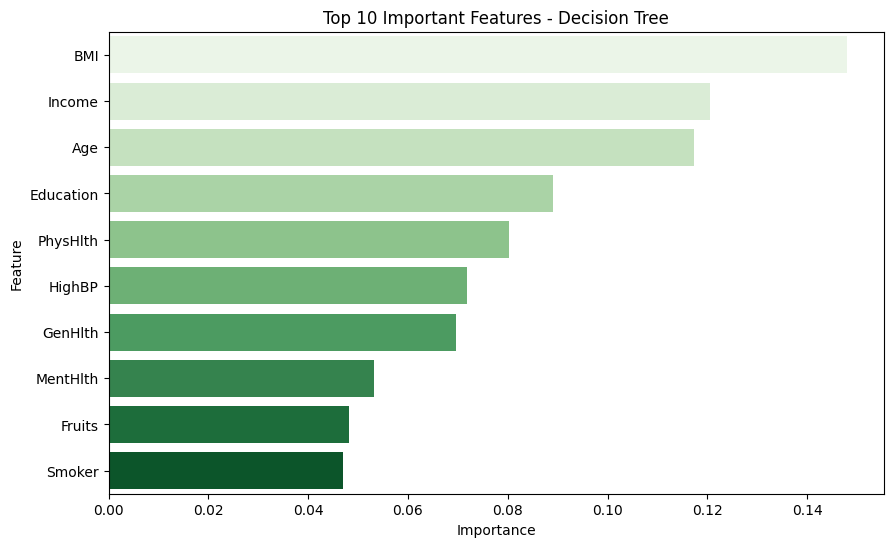

In [48]:
importances = dt_model.feature_importances_
features = x_train.columns

# Create a DataFrame
dt_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort by importance
dt_importance_df = dt_importance_df.sort_values('Importance', ascending=False)

# Plot top features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=dt_importance_df.head(10), palette='Greens')
plt.title('Top 10 Important Features - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Create and train the Logistic Regression model
clf = LogisticRegression(max_iter=1000, random_state=10)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=10)

In [50]:
# 2. Predict on train and test sets
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

# 3. Evaluate performance
print("Training Results:")
metrics_train_log = evaluate_model(y_train, y_train_pred)
print(metrics_train_log)

print("\nTesting Results:")
metrics_test_log = evaluate_model(y_test, y_test_pred)
print(metrics_test_log)

Training Results:
{'Accuracy': 0.864460146641438, 'Precision': 0.5490104772991851, 'Sensitivity (Recall)': 0.16635507425306006, 'Specificity': np.float64(0.9778115066296286), 'F1-Score': 0.255339884674734, 'Hamming Loss': 0.13553985335856197}

Testing Results:
{'Accuracy': 0.8661896877956481, 'Precision': 0.5471014492753623, 'Sensitivity (Recall)': 0.1726454194654852, 'Specificity': np.float64(0.9771371087587737), 'F1-Score': 0.26246605105920695, 'Hamming Loss': 0.13381031220435194}


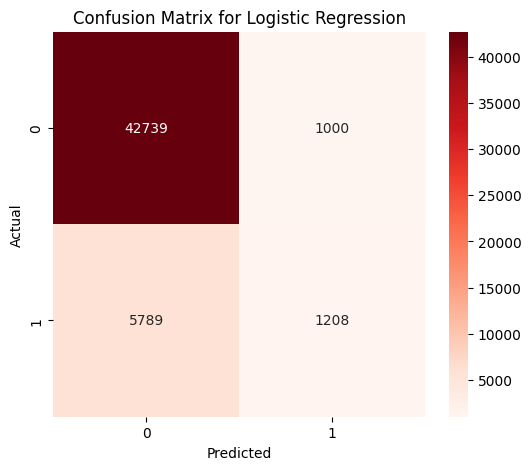

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm3 = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

<ipython-input-52-ad9fde5ed099>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance_abs', y='Feature', data=importance_df.head(10), palette='Reds')


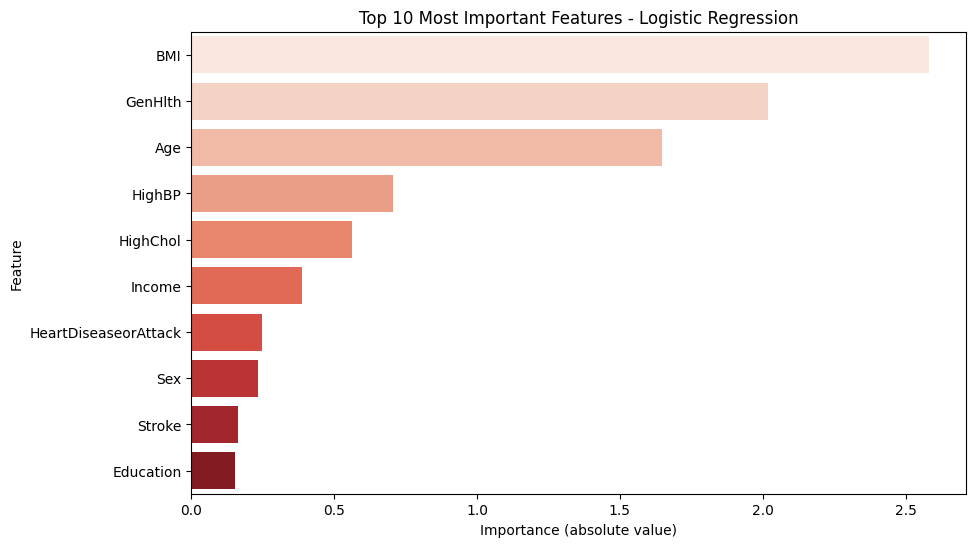

In [52]:
import numpy as np

# Get the feature importance (coefficients)
feature_importance = clf.coef_[0]

# Map to feature names
features = x_train.columns

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Take absolute values because direction (+/-) is not important for now
importance_df['Importance_abs'] = np.abs(importance_df['Importance'])

# Sort by absolute importance
importance_df = importance_df.sort_values('Importance_abs', ascending=False)

# Plot the top features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance_abs', y='Feature', data=importance_df.head(10), palette='Reds')
plt.title('Top 10 Most Important Features - Logistic Regression')
plt.xlabel('Importance (absolute value)')
plt.ylabel('Feature')
plt.show()

### K-Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(x_train, y_train.values.ravel())

KNeighborsClassifier()

In [54]:
# Make predictions
y_train_pred_knn = knn_model.predict(x_train)
y_test_pred_knn = knn_model.predict(x_test)

print("K-Nearest Neighbors Training Results:")
metrics_train_knn = evaluate_model(y_train, y_train_pred_knn)
print(metrics_train_knn)

print("\nK-Nearest Neighbors Testing Results:")
metrics_test_knn = evaluate_model(y_test, y_test_pred_knn)
print(metrics_test_knn)

K-Nearest Neighbors Training Results:
{'Accuracy': 0.8860917297382529, 'Precision': 0.6812889812889813, 'Sensitivity (Recall)': 0.3467847190377086, 'Specificity': np.float64(0.9736590394913943), 'F1-Score': 0.4596180368872578, 'Hamming Loss': 0.11390827026174709}

K-Nearest Neighbors Testing Results:
{'Accuracy': 0.8486084831283507, 'Precision': 0.40457589285714285, 'Sensitivity (Recall)': 0.20723167071602117, 'Specificity': np.float64(0.9512105900912229), 'F1-Score': 0.2740761742746432, 'Hamming Loss': 0.1513915168716493}


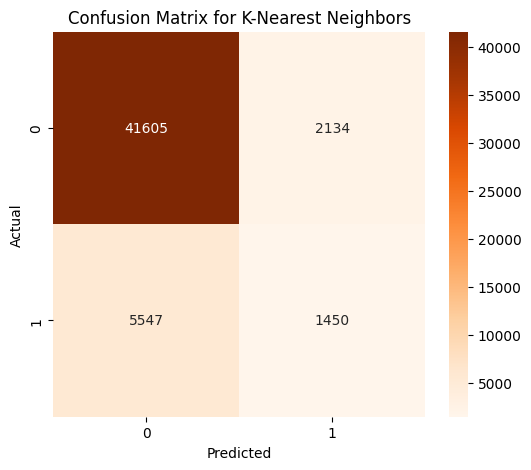

In [55]:
cm4 = confusion_matrix(y_test, y_test_pred_knn)

plt.figure(figsize=(6,5))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()

### Naïve Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train.values.ravel())

GaussianNB()

In [38]:
# Predict
y_train_pred_nb = nb_model.predict(x_train)
y_test_pred_nb = nb_model.predict(x_test)

# Evaluate
print("Naïve Bayes Training Results:")
train_results_nb = evaluate_model(y_train, y_train_pred_nb)
print(train_results_nb)

print("\nNaïve Bayes Testing Results:")
test_results_nb = evaluate_model(y_test, y_test_pred_nb)
print(test_results_nb)

Naïve Bayes Training Results:
{'Accuracy': 0.7974564411857458, 'Precision': 0.3457557436517533, 'Sensitivity (Recall)': 0.5043211400754877, 'Specificity': np.float64(0.8450528365646209), 'F1-Score': 0.41024978837572995, 'Hamming Loss': 0.20254355881425418}

Naïve Bayes Testing Results:
{'Accuracy': 0.7961013875748975, 'Precision': 0.3380104509386491, 'Sensitivity (Recall)': 0.4992139488352151, 'Specificity': np.float64(0.8435949610187704), 'F1-Score': 0.40309272402054125, 'Hamming Loss': 0.2038986124251025}


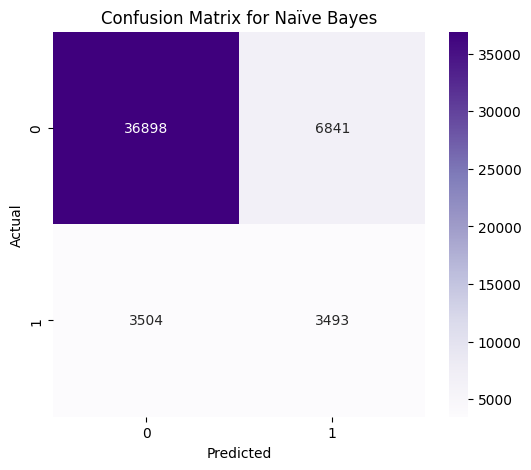

In [40]:
cm5 = confusion_matrix(y_test, y_test_pred_nb)

plt.figure(figsize=(6,5))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naïve Bayes')
plt.show()

## Comparing Result

In [58]:
# Logistic Regression evaluation
logreg_train_results = evaluate_model(y_train, y_train_pred)
logreg_test_results = evaluate_model(y_test, y_test_pred)

# Random Forest evaluation
rf_train_results = evaluate_model(y_train, y_train_pred_rf)
rf_test_results = evaluate_model(y_test, y_test_pred_rf)

# Decision Tree evaluation
dt_train_results = evaluate_model(y_train, y_train_pred_dt)
dt_test_results = evaluate_model(y_test, y_test_pred_dt)

# KNN evaluation
knn_train_results = evaluate_model(y_train, y_train_pred_knn)
knn_test_results = evaluate_model(y_test, y_test_pred_knn)

# SVM evaluation
nb_train_results = evaluate_model(y_train, y_train_pred_nb)
nb_test_results = evaluate_model(y_test, y_test_pred_nb)

In [59]:
# Store results in a dictionary for training and testing sets
model_comparison = {
    # "Logistic Regression (Train)": logreg_train_results,
    # "Random Forest (Train)": rf_train_results,
    # "Decision Tree (Train)": dt_train_results,
    # "K-Nearest Neighbors (Train)": knn_train_results,
    # "SVM (Train)": svm_train_results,

    "Logistic Regression (Test)": logreg_test_results,
    "Random Forest (Test)": rf_test_results,
    "Decision Tree (Test)": dt_test_results,
    "K-Nearest Neighbors (Test)": knn_test_results,
    "Naïve Bayes (Test)": nb_test_results
}

comparison_df = pd.DataFrame(model_comparison)
comparison_df

,Logistic Regression (Test),Random Forest (Test),Decision Tree (Test),K-Nearest Neighbors (Test),Naïve Bayes (Test)
Accuracy,0.866190,0.856335,0.800339,0.848608,0.796101
Precision,0.547101,0.449655,0.295309,0.404576,0.338010
Sensitivity (Recall),0.172645,0.186366,0.322996,0.207232,0.499214
Specificity,0.977137,0.963511,0.876700,0.951211,0.843595
F1-Score,0.262466,0.263514,0.308532,0.274076,0.403093
Hamming Loss,0.133810,0.143665,0.199661,0.151392,0.203899


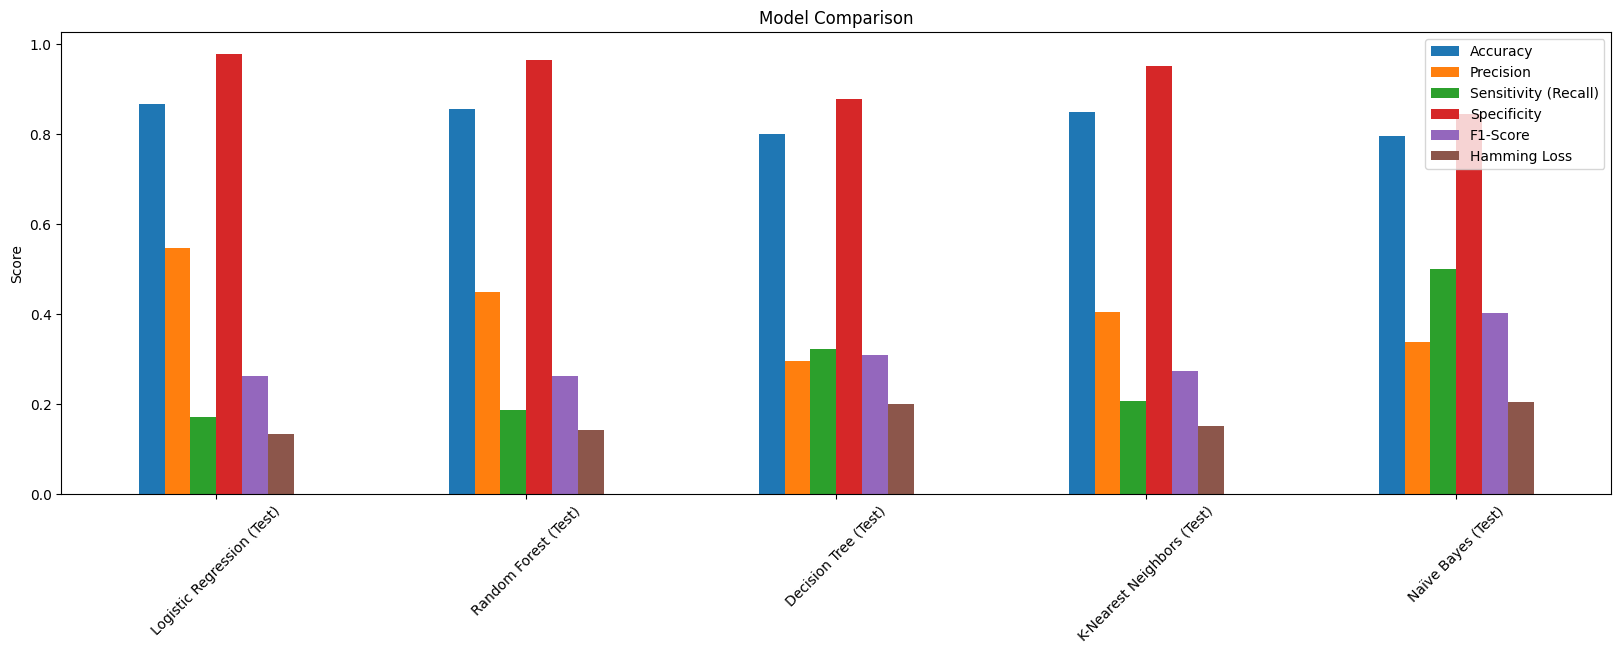

In [60]:
import matplotlib.pyplot as plt

# Plotting comparison of metrics
metrics = ['Accuracy', 'Precision', 'Sensitivity (Recall)', 'Specificity', 'F1-Score', 'Hamming Loss']
comparison_df.T[metrics].plot(kind='bar', figsize=(20, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

## Hyperparameter tuning


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize model with class weight balancing
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=10)

# Setup GridSearchCV to optimize for recall
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(x_train, y_train.values.ravel())

# Get best model
best_dt_model = grid_search.best_estimator_

# Evaluate
y_train_pred_dt_new = best_dt_model.predict(x_train)
y_test_pred_dt_new = best_dt_model.predict(x_test)

# Use your evaluation function
train_results = evaluate_model(y_train, y_train_pred_dt_new)
test_results = evaluate_model(y_test, y_test_pred_dt_new)

print("Best Hyperparameters:\n", grid_search.best_params_)
print("\nTrain Results:\n", train_results)
print("\nTest Results:\n", test_results)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Hyperparameters:
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

Train Results:
 {'Accuracy': 0.6910773415326396, 'Precision': 0.27778568563257805, 'Sensitivity (Recall)': 0.7572401142897457, 'Specificity': np.float64(0.6803344883874108), 'F1-Score': 0.40646419509978415, 'Hamming Loss': 0.30892265846736044}

Test Results:
 {'Accuracy': 0.6918361715547146, 'Precision': 0.2771873710276517, 'Sensitivity (Recall)': 0.7679005287980563, 'Specificity': np.float64(0.6796680308191774), 'F1-Score': 0.40733861491224743, 'Hamming Loss': 0.3081638284452854}


In [62]:
from sklearn.tree import DecisionTreeClassifier

# ==== Initialize and train DT model ====
dt_modelv2 = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    criterion='gini',
    class_weight='balanced',
    random_state=10
)

dt_modelv2.fit(x_train, y_train)

# ==== Predict probabilities ====
y_train_probs = dt_modelv2.predict_proba(x_train)[:, 1]
y_test_probs = dt_modelv2.predict_proba(x_test)[:, 1]

# ==== Use adjusted threshold (e.g., 0.6) ====
threshold = 0.55
y_train_pred_dtv2 = (y_train_probs >= threshold).astype(int)
y_test_pred_dtv2 = (y_test_probs >= threshold).astype(int)

print("Train Results:")
print(evaluate_model(y_train, y_train_pred_dtv2))

print("\nTest Results:")
print(evaluate_model(y_test, y_test_pred_dtv2))

Train Results:
{'Accuracy': 0.6570925969725638, 'Precision': 0.2562241399692635, 'Sensitivity (Recall)': 0.7645419591519983, 'Specificity': np.float64(0.639646037973596), 'F1-Score': 0.38381781315577435, 'Hamming Loss': 0.34290740302743616}

Test Results:
{'Accuracy': 0.6563978240302744, 'Precision': 0.2544470588235294, 'Sensitivity (Recall)': 0.772759754180363, 'Specificity': np.float64(0.6377832140652507), 'F1-Score': 0.38283711544588805, 'Hamming Loss': 0.34360217596972564}


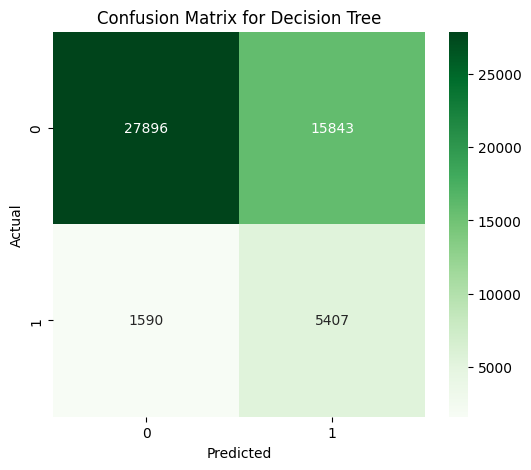

In [63]:
cm6 = confusion_matrix(y_test, y_test_pred_dtv2)

plt.figure(figsize=(6,5))
sns.heatmap(cm6, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

### Random Forest

In [61]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2'],
#     'class_weight': [None, 'balanced']
# }

# rf = RandomForestClassifier(random_state=10)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=5, n_jobs=-1, scoring='f1', verbose=1)
# grid_search.fit(x_train, y_train.values.ravel())

# best_rf = grid_search.best_estimator_
# print("Best Parameters:\n", grid_search.best_params_)

# y_train_pred_rf_new = best_rf.predict(x_train)
# y_test_pred_rf_new = best_rf.predict(x_test)

# train_results = evaluate_model(y_train, y_train_pred_rf_new)
# test_results = evaluate_model(y_test, y_test_pred_rf_new)

# print("Train Results:\n", train_results)
# print("Test Results:\n", test_results)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=10)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='recall',
                                   n_jobs=-1, verbose=1, random_state=42)
random_search.fit(x_train, y_train.values.ravel())

best_rf = random_search.best_estimator_
print("Best Hyperparameters:\n", random_search.best_params_)

y_train_pred_rf_new = best_rf.predict(x_train)
y_test_pred_rf_new = best_rf.predict(x_test)

train_results = evaluate_model(y_train, y_train_pred_rf_new)
test_results = evaluate_model(y_test, y_test_pred_rf_new)

print("Train Results:\n", train_results)
print("Test Results:\n", test_results)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters:
 {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 271}
Train Results:
 {'Accuracy': 0.7136845632292652, 'Precision': 0.2988386084934359, 'Sensitivity (Recall)': 0.7796747680694205, 'Specificity': np.float64(0.7029697299464475), 'F1-Score': 0.43207052936116974, 'Hamming Loss': 0.2863154367707348}
Test Results:
 {'Accuracy': 0.7142660044150111, 'Precision': 0.2976691485917773, 'Sensitivity (Recall)': 0.7884807774760612, 'Specificity': np.float64(0.7023937447129563), 'F1-Score': 0.43218048646743173, 'Hamming Loss': 0.28573399558498896}


In [64]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {
    'n_estimators': 300,
    'max_depth': 8,
    'max_features': 'log2',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'class_weight': 'balanced',
    'random_state': 10
}

rf_modelv2 = RandomForestClassifier(**params_rf)
rf_modelv2.fit(x_train, y_train.values.ravel())

y_train_pred_rfv2 = rf_modelv2.predict(x_train)
y_test_pred_rfv2 = rf_modelv2.predict(x_test)

print("Train Results:")
print(evaluate_model(y_train, y_train_pred_rfv2))

print("\nTest Results:")
print(evaluate_model(y_test, y_test_pred_rfv2))

Train Results:
{'Accuracy': 0.7248009303058972, 'Precision': 0.3096790266993315, 'Sensitivity (Recall)': 0.789234188154785, 'Specificity': np.float64(0.7143388985938887), 'F1-Score': 0.4448199765402891, 'Hamming Loss': 0.2751990696941028}

Test Results:
{'Accuracy': 0.722445600756859, 'Precision': 0.30457328846472115, 'Sensitivity (Recall)': 0.7890524510504502, 'Specificity': np.float64(0.7117903930131004), 'F1-Score': 0.4395000796051584, 'Hamming Loss': 0.27755439924314096}


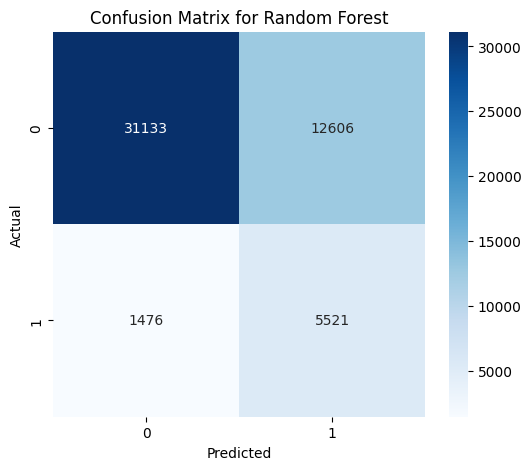

In [65]:
cm7 = confusion_matrix(y_test, y_test_pred_rfv2)

plt.figure(figsize=(6,5))
sns.heatmap(cm7, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

## Comparing Result v2

In [66]:
# Random Forest evaluation
rf_train_results = evaluate_model(y_train, y_train_pred_rf)
rf_test_results = evaluate_model(y_test, y_test_pred_rf)

# Decision Tree evaluation
dt_train_results = evaluate_model(y_train, y_train_pred_dt)
dt_test_results = evaluate_model(y_test, y_test_pred_dt)

# Random Forest evaluation
rf_train_results2 = evaluate_model(y_train, y_train_pred_rfv2)
rf_test_results2 = evaluate_model(y_test, y_test_pred_rfv2)

# Decision Tree evaluation
dt_train_results2 = evaluate_model(y_train, y_train_pred_dtv2)
dt_test_results2 = evaluate_model(y_test, y_test_pred_dtv2)

model_comparison2 = {
    "Random Forest (Test)": rf_test_results,
    "Decision Tree (Test)": dt_test_results,
    "Random Forest v2 (Test)": rf_test_results2,
    "Decision Tree v2 (Test)": dt_test_results2,

}

comparison_df2 = pd.DataFrame(model_comparison2)
comparison_df2

,Random Forest (Test),Decision Tree (Test),Random Forest v2 (Test),Decision Tree v2 (Test)
Accuracy,0.856335,0.800339,0.722446,0.656398
Precision,0.449655,0.295309,0.304573,0.254447
Sensitivity (Recall),0.186366,0.322996,0.789052,0.772760
Specificity,0.963511,0.876700,0.711790,0.637783
F1-Score,0.263514,0.308532,0.439500,0.382837
Hamming Loss,0.143665,0.199661,0.277554,0.343602


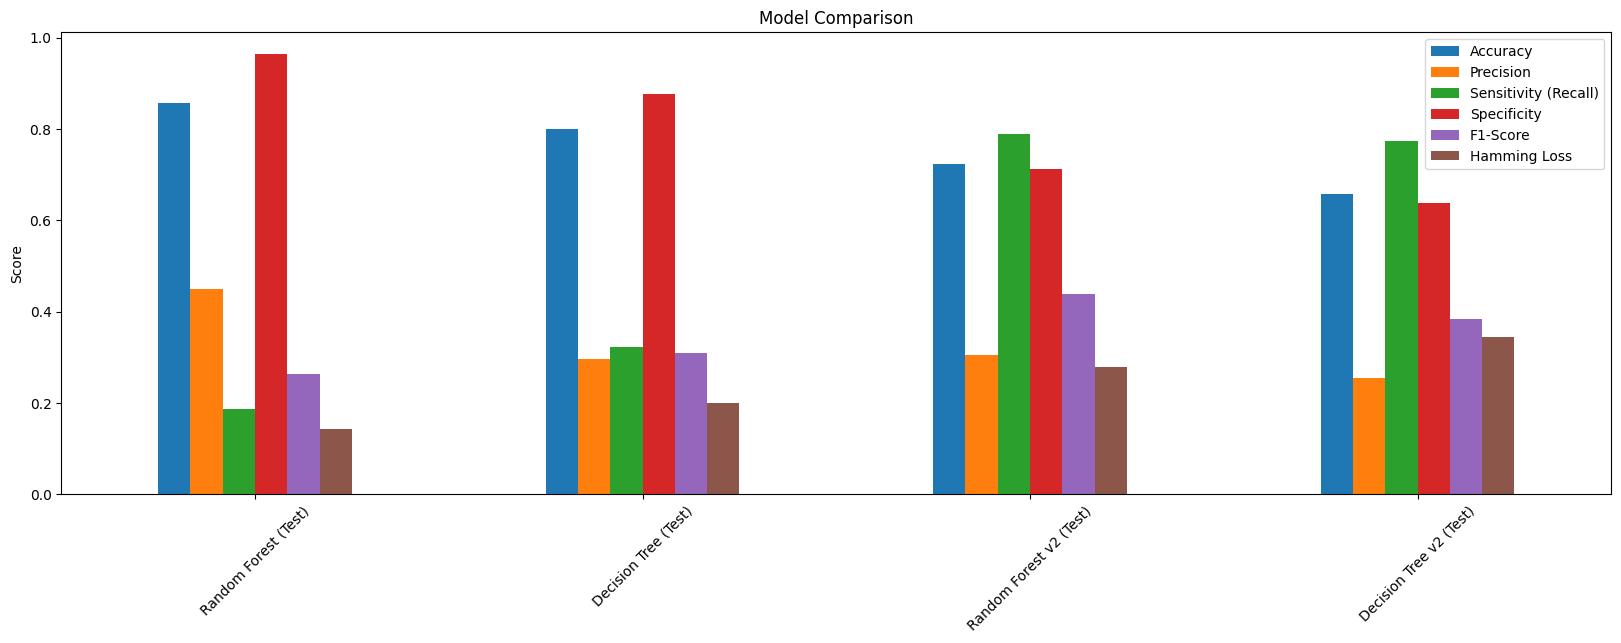

In [ ]:
import matplotlib.pyplot as plt

# Plotting comparison of metrics
metrics = ['Accuracy', 'Precision', 'Sensitivity (Recall)', 'Specificity', 'F1-Score', 'Hamming Loss']
comparison_df2.T[metrics].plot(kind='bar', figsize=(20, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(X_scaled, y)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resampled == 0)))

After OverSampling, counts of label '1': 218334
After OverSampling, counts of label '0': 218334


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Random Forest
rfv3 = RandomForestClassifier(random_state=10)
rfv3.fit(x_train2, y_train2)

RandomForestClassifier(random_state=10)

In [ ]:
# Predictions
y_train_pred_rfv3 = rfv3.predict(x_train2)
y_test_pred_rfv3 = rfv3.predict(x_test2)

print("Random Forest Training Results:")
metrics_train_rf = evaluate_model(y_train2, y_train_pred_rfv3)
print(metrics_train_rf)

print("\nRandom Forest Testing Results:")
metrics_test_rf = evaluate_model(y_test2, y_test_pred_rfv3)
print(metrics_test_rf)

Random Forest Training Results:
{'Accuracy': 0.9948272999479009, 'Precision': 0.997040161842801, 'Sensitivity (Recall)': 0.9926075537983556, 'Specificity': np.float64(0.9970497419240265), 'F1-Score': 0.9948189202595414, 'Hamming Loss': 0.005172700052099137}

Random Forest Testing Results:
{'Accuracy': 0.9173403256463691, 'Precision': 0.9358181033242193, 'Sensitivity (Recall)': 0.8957094648883175, 'Specificity': np.float64(0.9388664245082585), 'F1-Score': 0.9153246143921178, 'Hamming Loss': 0.08265967435363089}


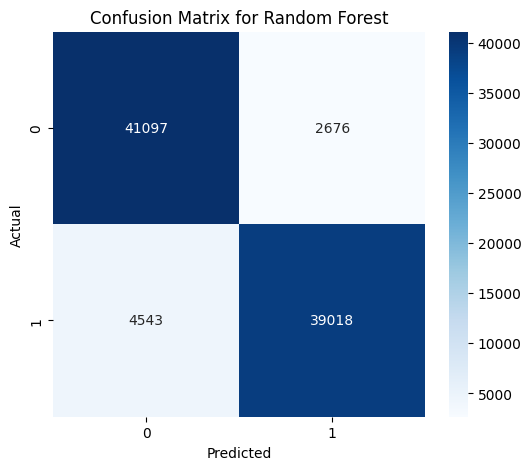

In [ ]:
cm8 = confusion_matrix(y_test2, y_test_pred_rfv3)

plt.figure(figsize=(6,5))
sns.heatmap(cm8, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_modelv3 = DecisionTreeClassifier(random_state=10)
dt_modelv3.fit(x_train2, y_train2.values.ravel())

DecisionTreeClassifier(random_state=10)

In [ ]:
y_train_pred_dtv3 = dt_modelv3.predict(x_train2)
y_test_pred_dtv3 = dt_modelv3.predict(x_test2)

print("Decision Tree Training Results:")
metrics_train_dt = evaluate_model(y_train2, y_train_pred_dtv3)
print(metrics_train_dt)

print("\nDecision Tree Testing Results:")
metrics_test_dt = evaluate_model(y_test2, y_test_pred_dtv3)
print(metrics_test_dt)

Decision Tree Training Results:
{'Accuracy': 0.9948387503077284, 'Precision': 0.9990939728999793, 'Sensitivity (Recall)': 0.9905820693127657, 'Specificity': np.float64(0.9991006009360625), 'F1-Score': 0.9948198139959834, 'Hamming Loss': 0.00516124969227158}

Decision Tree Testing Results:
{'Accuracy': 0.8776421554033939, 'Precision': 0.8741663062529876, 'Sensitivity (Recall)': 0.881591331695783, 'Specificity': np.float64(0.8737121056358943), 'F1-Score': 0.8778631189137293, 'Hamming Loss': 0.12235784459660613}


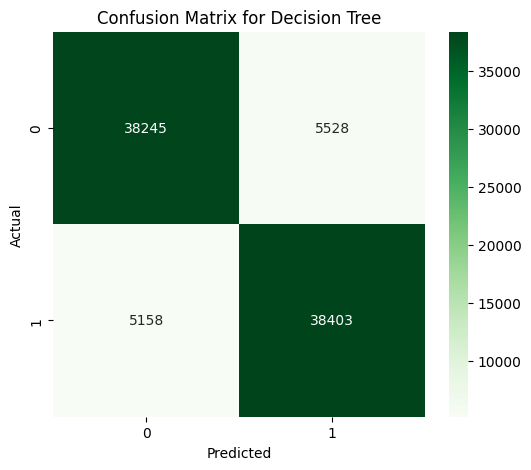

In [ ]:
cm9 = confusion_matrix(y_test2, y_test_pred_dtv3)

plt.figure(figsize=(6,5))
sns.heatmap(cm9, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

## Comparing Result v3

In [ ]:
# Random Forest evaluation
rf_train_results = evaluate_model(y_train, y_train_pred_rf)
rf_test_results = evaluate_model(y_test, y_test_pred_rf)

# Decision Tree evaluation
dt_train_results = evaluate_model(y_train, y_train_pred_dt)
dt_test_results = evaluate_model(y_test, y_test_pred_dt)

# Random Forest evaluation
rf_train_results2 = evaluate_model(y_train, y_train_pred_rfv2)
rf_test_results2 = evaluate_model(y_test, y_test_pred_rfv2)

# Decision Tree evaluation
dt_train_results2 = evaluate_model(y_train, y_train_pred_dtv2)
dt_test_results2 = evaluate_model(y_test, y_test_pred_dtv2)

# Random Forest evaluation
rf_train_results3 = evaluate_model(y_train2, y_train_pred_rfv3)
rf_test_results3 = evaluate_model(y_test2, y_test_pred_rfv3)

# Decision Tree evaluation
dt_train_results3 = evaluate_model(y_train2, y_train_pred_dtv3)
dt_test_results3 = evaluate_model(y_test2, y_test_pred_dtv3)

model_comparison2 = {
    "Random Forest (Test)": rf_test_results,
    "Decision Tree (Test)": dt_test_results,
    "Random Forest v2 (Test)": rf_test_results2,
    "Decision Tree v2 (Test)": dt_test_results2,
    "Random Forest v3 (Test)": rf_test_results3,
    "Decision Tree v3 (Test)": dt_test_results3,

}

comparison_df3 = pd.DataFrame(model_comparison2)
comparison_df3

,Random Forest (Test),Decision Tree (Test),Random Forest v2 (Test),Decision Tree v2 (Test),Random Forest v3 (Test),Decision Tree v3 (Test)
Accuracy,0.856335,0.800378,0.722446,0.656398,0.917340,0.877642
Precision,0.449551,0.295493,0.304573,0.254447,0.935818,0.874166
Sensitivity (Recall),0.185937,0.323281,0.789052,0.772760,0.895709,0.881591
Specificity,0.963579,0.876700,0.711790,0.637783,0.938866,0.873712
F1-Score,0.263067,0.308763,0.439500,0.382837,0.915325,0.877863
Hamming Loss,0.143665,0.199622,0.277554,0.343602,0.082660,0.122358


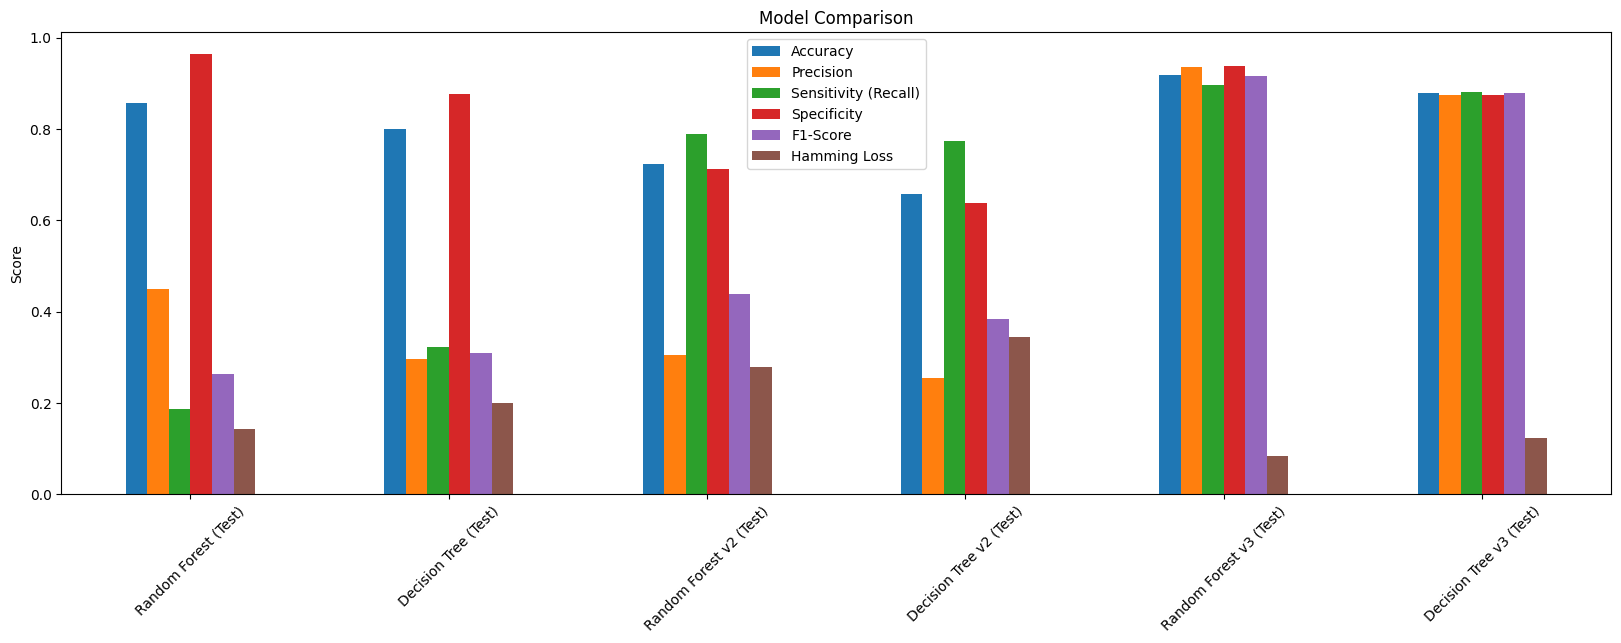

In [ ]:
import matplotlib.pyplot as plt

# Plotting comparison of metrics
metrics = ['Accuracy', 'Precision', 'Sensitivity (Recall)', 'Specificity', 'F1-Score', 'Hamming Loss']
comparison_df3.T[metrics].plot(kind='bar', figsize=(20, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()